In [1]:
# This downloads the GitHub repo, which includes one sample .npz file
# so you can explore without downloading the full dataset
!git clone https://github.com/CAMMA-public/TFUScapes.git #! prefix tells colab to run this as a terminal command, not python

Cloning into 'TFUScapes'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 79 (delta 38), reused 9 (delta 3), pack-reused 15 (from 1)
Receiving objects: 100% (79/79), 105.94 MiB | 29.57 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
import numpy as np

# Load the sample .npz file included in the repo
sample_path = 'TFUScapes/sample/TFUScapes/data/A00060925/exp_0.npz'
data = np.load(sample_path)

# .npz files are like zip archives of numpy arrays
# Let's see what arrays are stored inside
print("Keys in the .npz file:")
print(data.files)
print()

# For each array, print its shape and data type
for key in data.files:
    arr = data[key]
    print(f"  '{key}': shape={arr.shape}, dtype={arr.dtype}, "
          f"min={arr.min():.4f}, max={arr.max():.4f}")

Keys in the .npz file:
['tr_coords', 'ct', 'pmap']

  'tr_coords': shape=(17107, 3), dtype=int64, min=36.0000, max=208.0000
  'ct': shape=(256, 256, 256), dtype=float32, min=0.0000, max=2000.0000
  'pmap': shape=(256, 256, 256), dtype=float32, min=0.9541, max=668653.8125


In [3]:
import numpy as np
# Log scale reveals the beam structure that linear scale hides
log_pressure = np.log1p(data['pmap'])  # log(1 + x) to handle near-zero values

In [4]:
pmap = data['pmap']
max_idx = np.unravel_index(np.argmax(pmap), pmap.shape)
print(f"Peak pressure location (voxel): {max_idx}")
print(f"Peak pressure value: {pmap[max_idx]:.1f} Pa")

# Now slice through the peak in all three orientations
# This guarantees you see the focal spot

Peak pressure location (voxel): (np.int64(150), np.int64(137), np.int64(122))
Peak pressure value: 668653.8 Pa


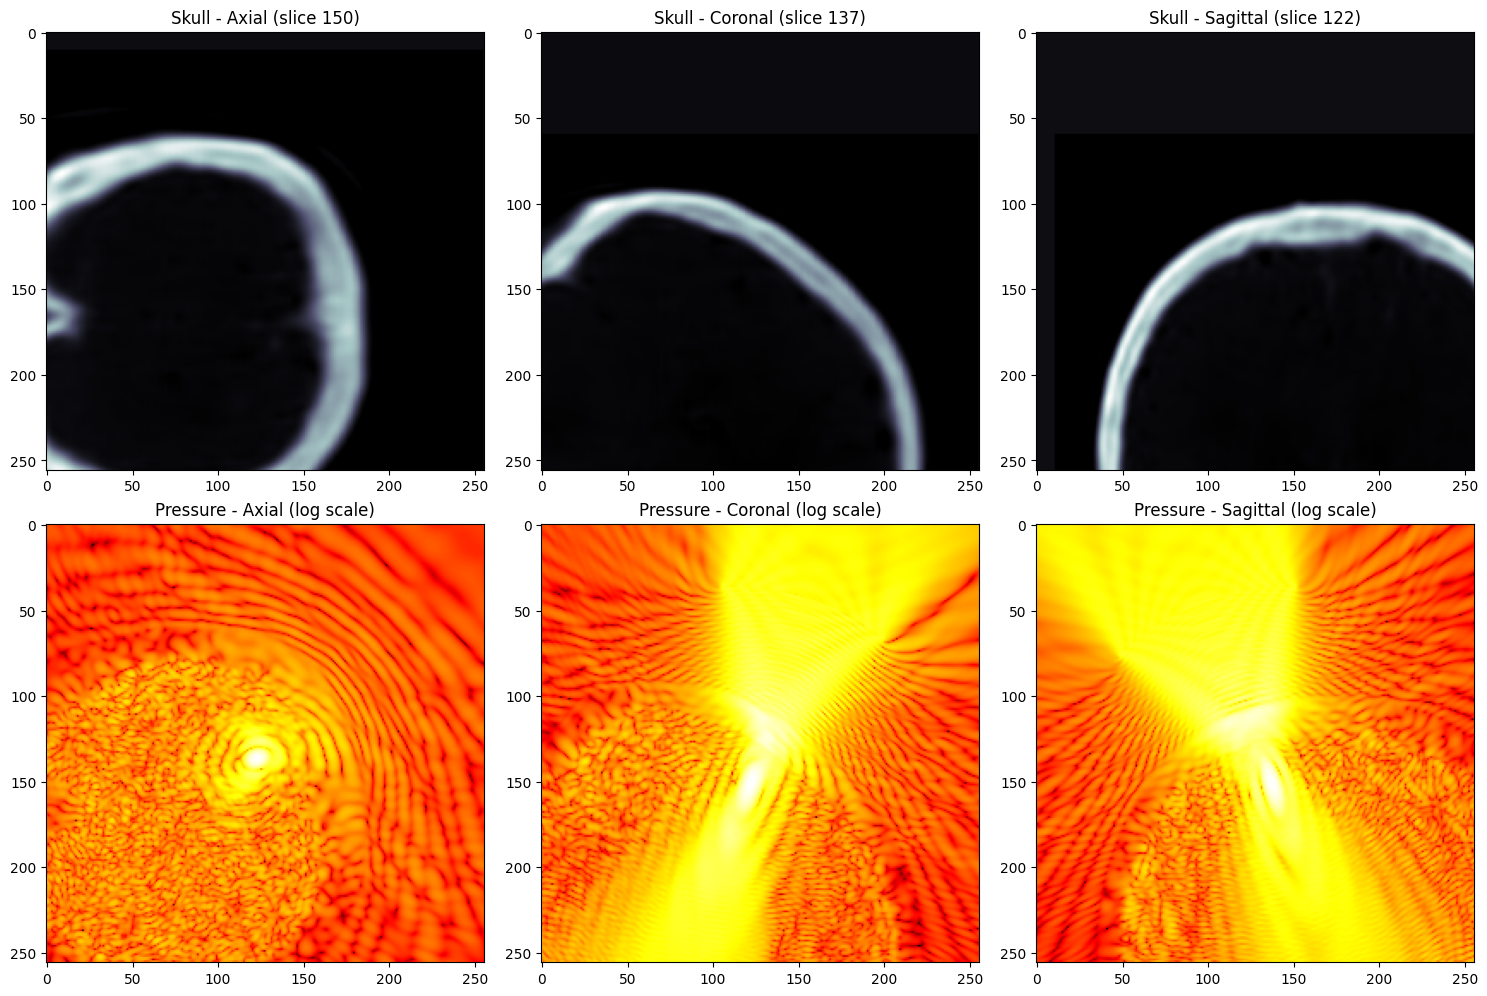

In [6]:
import matplotlib.pyplot as plt

# Slice through the peak in all three orientations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ct = data['ct']
pmap = data['pmap']
log_pmap = np.log1p(pmap)

# Use the peak coordinates as slice positions
ax_slice, cor_slice, sag_slice = 150, 137, 122

# Top row: skull anatomy
axes[0, 0].imshow(ct[ax_slice, :, :], cmap='bone')
axes[0, 0].set_title(f'Skull - Axial (slice {ax_slice})')
axes[0, 1].imshow(ct[:, cor_slice, :], cmap='bone')
axes[0, 1].set_title(f'Skull - Coronal (slice {cor_slice})')
axes[0, 2].imshow(ct[:, :, sag_slice], cmap='bone')
axes[0, 2].set_title(f'Skull - Sagittal (slice {sag_slice})')

# Bottom row: log-scaled pressure
axes[1, 0].imshow(log_pmap[ax_slice, :, :], cmap='hot')
axes[1, 0].set_title('Pressure - Axial (log scale)')
axes[1, 1].imshow(log_pmap[:, cor_slice, :], cmap='hot')
axes[1, 1].set_title('Pressure - Coronal (log scale)')
axes[1, 2].imshow(log_pmap[:, :, sag_slice], cmap='hot')
axes[1, 2].set_title('Pressure - Sagittal (log scale)')

plt.tight_layout()
plt.show()

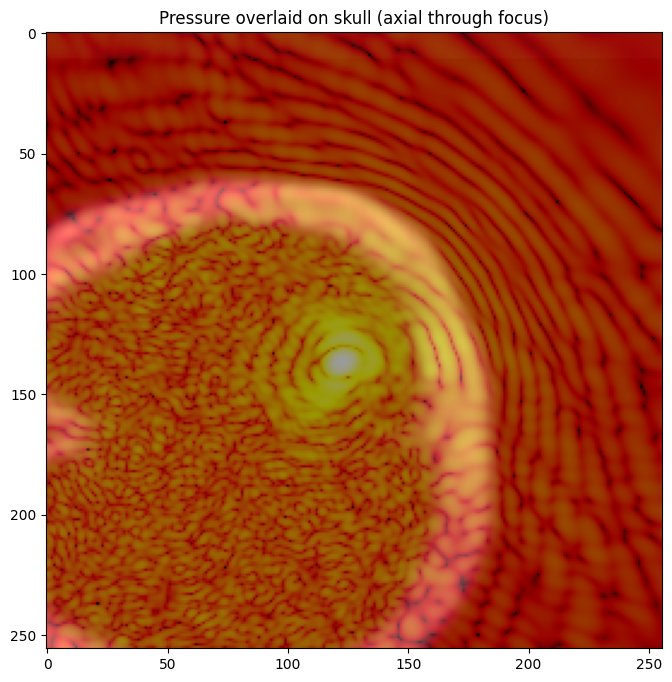

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.imshow(ct[ax_slice, :, :], cmap='bone')
pressure_slice = log_pmap[ax_slice, :, :]
masked = np.ma.masked_where(pressure_slice < pressure_slice.max() * 0.3, pressure_slice)
ax.imshow(masked, cmap='hot', alpha=0.6)
ax.set_title('Pressure overlaid on skull (axial through focus)')
plt.show()